### Find the values of E and S using a Gaussian fit

#### Jpype version notebook (no need to run script 8 in the Fiji script editor)

The last step of the analysis is to find the E and S values that correspond to the ensemble averages of the dataset. To do so, a Gaussian curve is fitted to the histogram. 

In [1]:
import imagej
# Change the path to Fiji to match your computer
ij = imagej.init('/Applications/Fiji-newtesting.app')

import jpype
import jpype.imports
import scyjava as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from java.io import File
from de.mpg.biochem.mars.molecule import SingleMoleculeArchive
import seaborn as sns
from scipy.stats import norm
from pylab import *
from scipy.optimize import curve_fit

In [2]:
# Load the archive you generated. Add your file path here:
yamaFile = File('/Users/nadiahuisjes/Desktop/merged.yama') #change this line
archive = SingleMoleculeArchive(yamaFile)

In [11]:
# Extract the values of E and S of each molecule tagged 'Active_single'
# These values will be stored in the lists E and S
E = []
S = []

for UID in archive.getMoleculeUIDs():
    molecule = archive.get(UID)
    if molecule.hasTag("Active_single"):
        E.append(molecule.getParameter("E"))
        S.append(molecule.getParameter("S"))

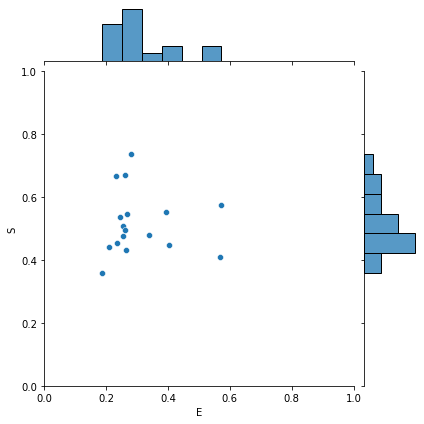

In [12]:
# Initial data exploration using a jointplot (similar to what has been plotted in Mars Rover)
df = pd.DataFrame(zip(E,S), columns = ['E','S'])
sns.jointplot(x='E', y='S', data=df, xlim = [0,1], ylim = [0,1])

Now define the gaussian function and make the fit against all E values. Print the fit parameters and corresponding errors and plot the result for a visual inspection

The fitted peak center lies at E = 0.24596705718777165 
 Sigma: 0.00551723359870373


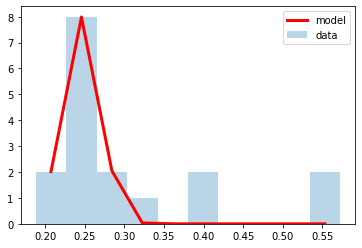

In [13]:
y,x,_=hist(E,10, alpha=0.3,label="data")
x=(x[1:]+x[:-1])/2 #required to define x as the middle of the box

#Define the gaussian function to fit against
def gauss(x,mu,sigma,A):
    return A*exp(-(x-mu)**2/2/sigma**2)

#Make and plot the fit
expected=(0.25,0.15,33) #expected peak center, width and height (mu, sigma, A)
params,cov=curve_fit(gauss,x,y,expected)
plot(x,gauss(x,*params),color='red',lw=3,label='model')
legend()
sigma=sqrt(diag(cov))
print('The fitted peak center lies at E =',params[0],'\n','Sigma:',sigma[0]) #prints the fit parameters and errors that were found
E_fit = list(params)

The fitted peak center lies at S = 0.4760670466328719 
 Sigma: 0.02453276739030037


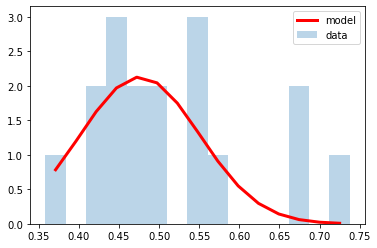

In [14]:
y,x,_=hist(S, 15, alpha=0.3,label="data")
x=(x[1:]+x[:-1])/2 #required to define x as the middle of the box

#Define the gaussian function to fit against
def gauss(x,mu,sigma,A):
    return A*exp(-(x-mu)**2/2/sigma**2)

#Make and plot the fit
expected=(0.5,0.15,18) #expected peak center, width and height (mu, sigma, A)
params,cov=curve_fit(gauss,x,y,expected)
plot(x,gauss(x,*params),color='red',lw=3,label='model')
legend()
sigma=sqrt(diag(cov))
print('The fitted peak center lies at S =', params[0],'\n','Sigma:',sigma[0]) #prints the fit parameters and errors that were found
S_fit = list(params)